## Preamble

Goal: Make a script which generates a set of output grid points in the ADMS-Urban additional specified points format.
- Point name
- X
- Y
- Z

## Imports

In [35]:
import numpy as np
import pandas as pd
from os import path, listdir
import matplotlib.pyplot as plt

## Code

Let's try loading up all the grid point data and having a look.

In [85]:
filename = [file for file in listdir(path.abspath("")) if path.splitext(file)[-1]==".asp"][0]
filepath = path.join(path.abspath(""), filename)
grid_200_df = pd.read_csv(filepath, names=["point_name", "X", "Y", "Z"])
print(grid_200_df.shape)

(78372, 4)


How many grid points are we expecting?

In [108]:
start = {"name": grid_200_df.point_name.values[0], 
         "X": grid_200_df.X.values[0], 
         "Y": grid_200_df.Y.values[0], 
         "Z": grid_200_df.Z.values[0]}
end = {"name": grid_200_df.point_name.values[-1], 
         "X": grid_200_df.X.values[-1], 
         "Y": grid_200_df.Y.values[-1], 
         "Z": grid_200_df.Z.values[-1]}

spacing = grid_200_df.X.values[1] - grid_200_df.X.values[0]

X_coords = np.arange(start["X"], end["X"]+1, spacing) # Need to +1 because of the way Python works.
Y_coords = np.arange(start["Y"], end["Y"]+1, spacing) # Ditto.

print(X_coords.shape[0] * Y_coords.shape[0])

78561


We're missing some expected data points.

Time to visualise!

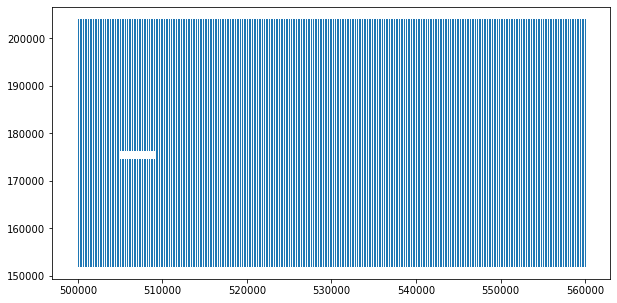

In [68]:
plt.figure(figsize=(10,5))
plt.plot(grid_200_df.X, grid_200_df.Y, "+", markersize=0.5)
plt.show()

Looks like a grid to me.

So why would the specified points file be missing some grid points? ... No idea.

In [155]:
X, Y = np.meshgrid(X_coords, Y_coords)
X = X.reshape((np.prod(X.shape), ))
Y = Y.reshape((np.prod(Y.shape), ))

In [175]:
coords_df = pd.DataFrame({"X": X, "Y": Y})
coords_df.shape

(78561, 2)

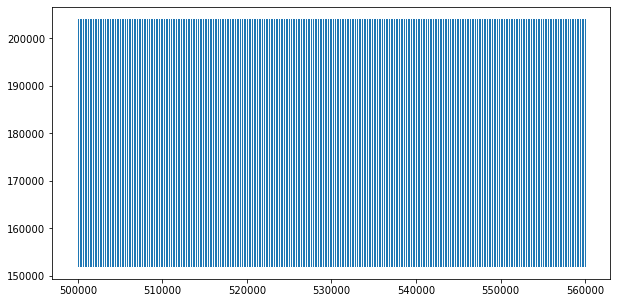

In [174]:
plt.figure(figsize=(10,5))
plt.plot(coords_df.X, coords_df.Y, "+", markersize=0.5)
plt.show()

Now our specified grid points have no gaps.

Let's make a function for making new grid points.

In [178]:
def create_grid_coords(start_X, end_X, start_Y, end_Y, spacing):
    X_coords = np.arange(start_X, end_X+1, spacing) # Need to +1 because of the way Python works.
    Y_coords = np.arange(start_Y, end_Y+1, spacing) # Ditto.
    X, Y = np.meshgrid(X_coords, Y_coords)
    X = X.reshape((np.prod(X.shape), ))
    Y = Y.reshape((np.prod(Y.shape), ))
    return X, Y

Let's use it to make a grid with 400 m x 400 m spacing.

In [180]:
X, Y = create_grid_coords(start["X"], end["X"], start["Y"], end["Y"], 400)
grid_400_df = pd.DataFrame({"X": X, "Y": Y})
grid_400_df.shape

(19781, 2)

What does this look like?

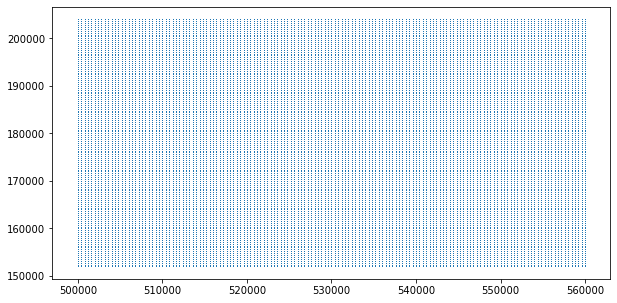

In [181]:
plt.figure(figsize=(10,5))
plt.plot(grid_400_df.X, grid_400_df.Y, "+", markersize=0.5)
plt.show()

Now we need to make a file formatted according to the ADMS-Urban .asp requirements.

In [198]:
grid_400_df["point_name"] = "|G|" + pd.Series(np.arange(0, len(grid_400_df))+1).astype(str).str.zfill(7)
grid_400_df["Z"] = 0

In [205]:
grid_400_df = grid_400_df[["point_name", "X", "Y", "Z"]]
print(grid_400_df.shape)

(19781, 4)


Great! Let's wrap this in a function.

In [203]:
def make_asp_file(start_X, end_X, start_Y, end_Y, spacing, save_folder):
    X, Y = create_grid_coords(start_X, end_X, start_Y, end_Y, spacing)
    df = pd.DataFrame({"X": X, "Y": Y})
    df["point_name"] = "|G|" + pd.Series(np.arange(0, len(df))+1).astype(str).str.zfill(7)
    df["Z"] = 0
    df = df[["point_name", "X", "Y", "Z"]]
    save_path = path.join(save_folder, f"{len(df)}_gridpoints.asp")
    df.to_csv(save_path)
    print(f"Saved file to {save_path}")

Now we can generate a new specified points file (.asp) for ADMS-Urban in one line.

In [204]:
make_asp_file(start["X"], end["X"], start["Y"], end["Y"], 400, path.abspath(""))

Saved file to /home/users/mwlw3/AQmortality/19781_gridpoints.asp
